In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pickle

In [17]:
gold = pd.read_csv("E:DATA SETS/Gold_data.csv",index_col=0,parse_dates= True)
Train = gold.head(1854)
Test = gold.tail(328)

In [18]:
model = sm.tsa.statespace.SARIMAX(Train,order=(0, 1, 2), seasonal_order=(0,1,2,31)) 

C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [19]:
results= model.fit() 


C:\Users\Win-10\AppData\Local\Temp/ipykernel_5344/110603026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['forecast']=results.predict(start=1,end=1854)


<AxesSubplot:xlabel='date'>

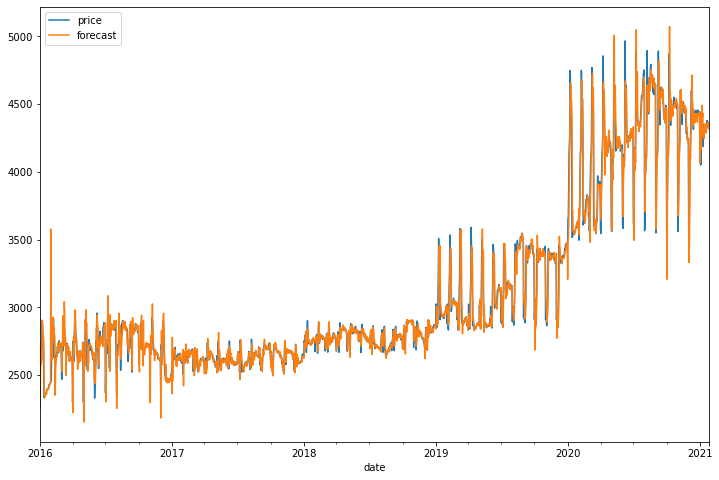

In [20]:
Train['forecast']=results.predict(start=1,end=1854)
Train[['price','forecast']].plot(figsize=(12,8))

In [22]:
from pandas.tseries.offsets import DateOffset
pred_date=[Train.index[-1]+ pd.DateOffset(days=x)for x in range(0,328)]
pred_date=pd.DataFrame(index=pred_date[0:],columns=Train.columns)
pred_date

,price,forecast
2021-01-27,NaN,NaN
2021-01-28,NaN,NaN
2021-01-29,NaN,NaN
2021-01-30,NaN,NaN
2021-01-31,NaN,NaN
...,...,...
2021-12-16,NaN,NaN
2021-12-17,NaN,NaN
2021-12-18,NaN,NaN
2021-12-19,NaN,NaN


In [24]:
Train=pd.concat([Train,pred_date])
Train['forecast']=results.predict(start=1854, end=2182)

<AxesSubplot:>

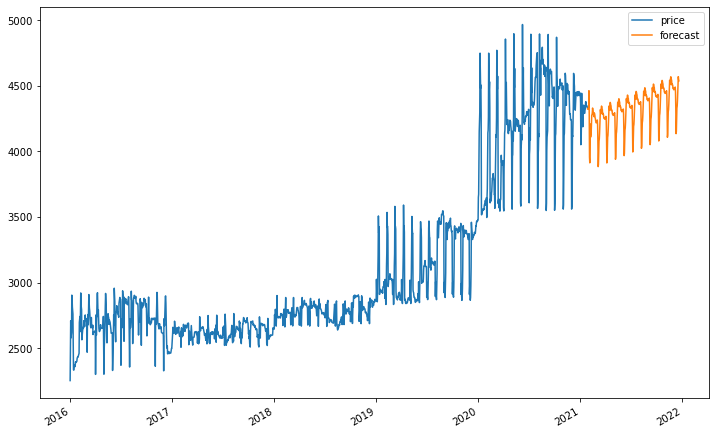

In [25]:
Train[['price','forecast']].plot(figsize=(12,8))

In [26]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax})
t=Train.forecast.tail(328).array
forecast_accuracy(t,Test.price.tail(328))

C:\Users\Win-10\AppData\Local\Temp/ipykernel_5344/1799112894.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\Win-10\AppData\Local\Temp/ipykernel_5344/1799112894.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


{'mape': 0.03686860267280385,
 'me': 60.3309125696117,
 'mae': 155.9378117334865,
 'mpe': 0.01483493461183487,
 'rmse': 184.9915788351006,
 'corr': nan,
 'minmax': nan}

# Final Model

In [2]:
gold1 = pd.read_csv("E:DATA SETS/Gold_data.csv",index_col=0,parse_dates = True)

In [3]:
Final_model = sm.tsa.statespace.SARIMAX(gold1,order=(0, 1, 2), seasonal_order=(0,1,2,31)) 
results1= Final_model.fit() 


C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Win-10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [4]:
from pandas.tseries.offsets import DateOffset
pred_date=[gold1.index[-1]+ pd.DateOffset(days=x)for x in range(0,61)]
pred_date=pd.DataFrame(index=pred_date[0:],columns=gold1.columns)
pred_date


,price
2021-12-21,NaN
2021-12-22,NaN
2021-12-23,NaN
2021-12-24,NaN
2021-12-25,NaN
...,...
2022-02-15,NaN
2022-02-16,NaN
2022-02-17,NaN
2022-02-18,NaN


In [5]:
gold1=pd.concat([gold1,pred_date])
gold1['forecast']=results1.predict(start=2181, end=2243)

In [6]:
conf_ins = results1.get_forecast(60).summary_frame()

In [7]:
dataset = conf_ins.copy()

In [8]:
dataset.rename(columns = {'mean':'predicted_price', 'mean_ci_lower':'lower_limit','mean_ci_upper':'upper_limit'}, inplace = True)


In [9]:
dataset

price,predicted_price,mean_se,lower_limit,upper_limit
2021-12-22,4361.370508,99.839211,4165.689251,4557.051766
2021-12-23,4317.473696,130.421089,4061.853058,4573.094334
2021-12-24,4299.144285,145.019461,4014.911364,4583.377206
2021-12-25,4288.192035,158.277056,3977.974707,4598.409364
2021-12-26,4276.488109,170.506914,3942.300699,4610.675519
2021-12-27,4307.719438,181.916433,3951.169781,4664.269096
2021-12-28,4303.559737,192.651421,3925.969891,4681.149584
2021-12-29,4302.519477,202.819011,3905.001520,4700.037433
2021-12-30,4285.664414,212.500664,3869.170765,4702.158063
2021-12-31,4275.232006,221.760036,3840.590322,4709.873690


<AxesSubplot:>

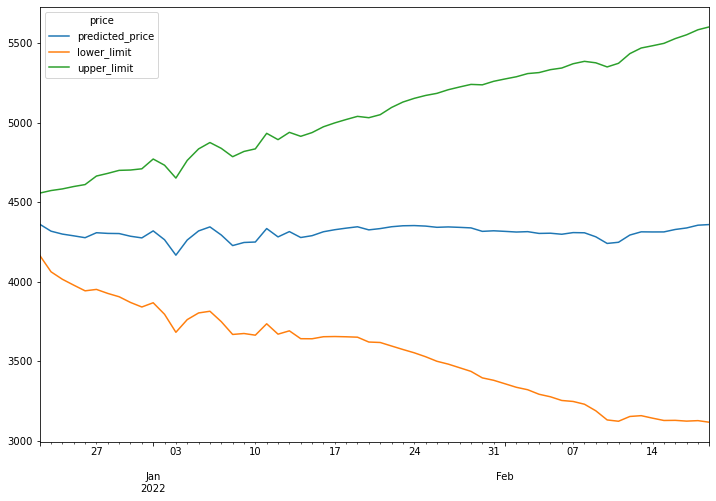

In [10]:
dataset[['predicted_price', 'lower_limit','upper_limit']].plot(figsize=(12, 8))

In [11]:
dataset.drop(columns=['mean_se'],inplace = True)
dataset

price,predicted_price,lower_limit,upper_limit
2021-12-22,4361.370508,4165.689251,4557.051766
2021-12-23,4317.473696,4061.853058,4573.094334
2021-12-24,4299.144285,4014.911364,4583.377206
2021-12-25,4288.192035,3977.974707,4598.409364
2021-12-26,4276.488109,3942.300699,4610.675519
2021-12-27,4307.719438,3951.169781,4664.269096
2021-12-28,4303.559737,3925.969891,4681.149584
2021-12-29,4302.519477,3905.001520,4700.037433
2021-12-30,4285.664414,3869.170765,4702.158063
2021-12-31,4275.232006,3840.590322,4709.873690
